<a href="https://colab.research.google.com/github/junjunmeng/Data-structure-and-Algo/blob/main/Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#09/09/2022 (2sum & 3sum)

## Q1: 2 sum

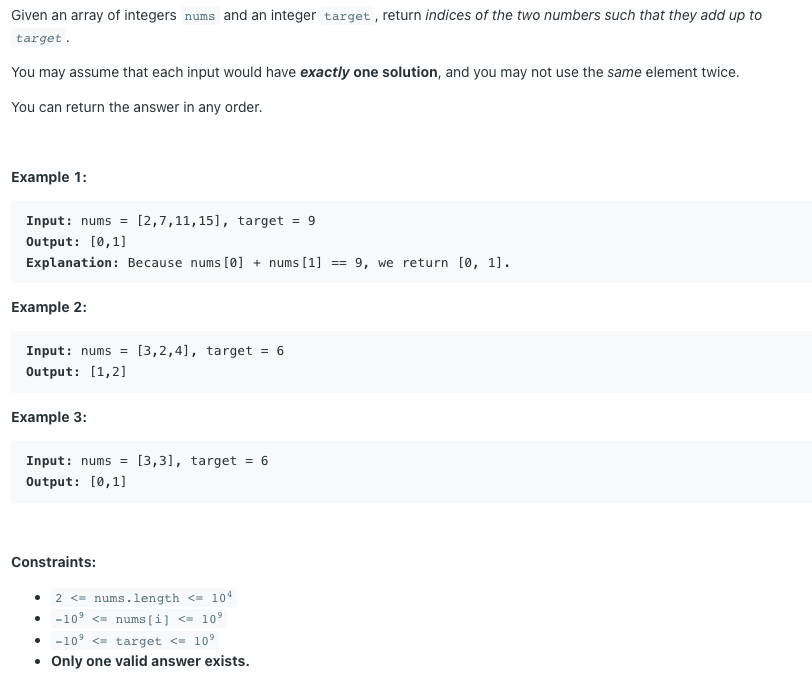


### Notes: need to clarify with interviewer:
1. sorted or non-sorted
2. duplicate
3. sample size

In [ ]:
def twosums(nums:list, target:int):
  for i in range(0, len(nums)):
    for j in range(i+1, len(nums)):
      if nums[i] + nums[j] == target:
       return ([i,j])

In [ ]:
#sorted 2sum
def twosums(nums:list, target:int):
  i, j = 0, len(nums) - 1
  while i < j:
    if nums[i] + nums[j] < target:
      i += 1
    elif nums[i] + nums[j] > target:
      j -= 1
    else:
      return True
  return False

In [ ]:
nums = [3,2,4, 2,4]
target = 6

twosums(nums, target) 


True

In [ ]:
def twosums(nums: list, target: int):
  if not nums:
    return []
  
  dic = {}
  for idx, v in enumerate(nums):
    res = target - v
    if res in dic:
      return [idx, dic[res]]
    else:
      dic[v] = idx
  return ("No two sum solution")


In [ ]:
twosums(nums, target)

[2, 1]

## Q2: 3 sum
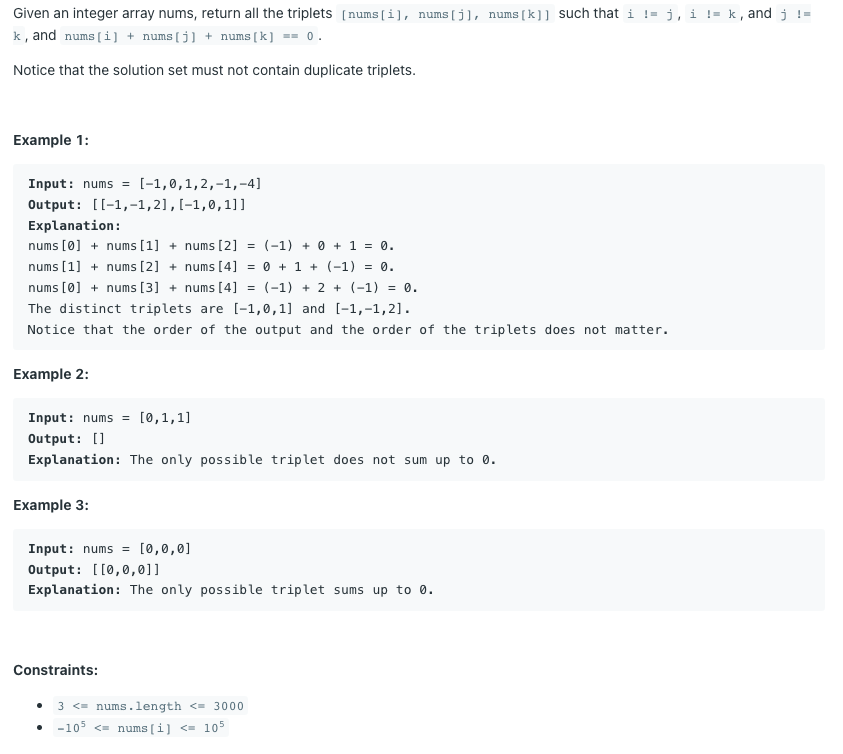

Notes: 
1. remove duplicates


In [ ]:
def threesums(nums:list, target: int):
  if len(nums) < 3:
    return []
  nums.sort()
  res = set()
  
  for idx, v in enumerate(nums[:-2]):
    if idx >= 1 and v == nums[idx-1]:
      continue
    
    d = {}
    for x in nums[idx+1:]:
      if x not in d:
        d[-v-x] = 1
      else:
        res.add((v, -v-x, x))
  return map(list, res)


In [ ]:
nums = [-1,0,1,2,4, -1, 0, 1]
target = 0
threesums(nums)

[[-1, -1, 2], [-1, 0, 1]]

In [ ]:
def threesums(nums:list):
  res = []
  nums.sort()

  for i, a in enumerate(nums):
    if i > 0 and a == nums[i-1]:
      continue
    
    l, r = i+1, len(nums)-1
    while l < r:
      threesum = a + nums[l] + nums[r]
      if threesum > 0:
        r -= 1
      elif threesum < 0:
        l += 1
      else:
        res.append([a, nums[l], nums[r]])
        l += 1
        while nums[l] == nums[l-1] and l < r:
          l += 1
  return res

In [ ]:
def threeSum(self, nums: List[int]) -> List[List[int]]:
    result = []
    nums.sort()
    for i in range(len(nums) - 2):
        #check dup
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        left = i + 1
        right = len(nums) - 1
        while left < right:
            total = nums[i] + nums[left] + nums[right]
            if total > 0:
                right -= 1
            elif total < 0:
                left += 1
            else:
                result.append((nums[i], nums[left], nums[right]))
                  #remove dup
                while left < right and nums[left] == nums[left + 1]: 
                    left += 1
                while left < right and nums[right] == nums[right - 1]:
                    right -= 1
                left += 1
                right -= 1
    return result

# 09/23/22 (remove dups in array / string)

##Q1: [26. Remove Duplicates from Sorted Array](https://leetcode.com/problems/remove-duplicates-from-sorted-array/)


Given an integer array nums sorted in non-decreasing order, remove the duplicates in-place such that each unique element appears only once. The relative order of the elements should be kept the same.

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.

Return k after placing the final result in the first k slots of nums.

follow up question: [80. Remove Duplicates from Sorted Array II](https://leetcode.com/problems/remove-duplicates-from-sorted-array-ii/)

In [ ]:
def removeDuplicates(nums):
    #corner case
    if len(nums) < 2:
        return len(nums)
    slow = 0
    fast = 1
    while fast < len(nums):
        if nums[fast] != nums[slow]:
            slow += 1
            nums[slow] = nums[fast]
        fast += 1
    return slow + 1

In [ ]:
nums = [1,4,4, 7,7,7,7, 8]

In [ ]:
#follow up question 80
def removeDuplicates(nums):
    #corner case
    if len(nums) < 3:
        return len(nums)
    slow = fast = 2
    while fast < len(nums):
        if nums[fast] != nums[slow - 2]:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    return slow,nums[:slow-1]

In [ ]:
removeDuplicates(nums)

(7, [1, 4, 4, 7, 7, 8])

##Q2: [1047. Remove All Adjacent Duplicates In String](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string/)


You are given a string s consisting of lowercase English letters. A duplicate removal consists of choosing two adjacent and equal letters and removing them.

We repeatedly make duplicate removals on s until we no longer can.

Return the final string after all such duplicate removals have been made. It can be proven that the answer is unique.

follow up question: [1209. Remove All Adjacent Duplicates in String II](https://leetcode.com/problems/remove-all-adjacent-duplicates-in-string-ii/) 


In [ ]:
def removeDuplicates(self, s: str) -> str:
    #corner case
    if not s or len(s) == 1:
        return s
    stack = []
    for char in s:
        if stack and stack[-1] == char:
            stack.pop()
        else:
            stack.append(char)
    return "".join(stack)

In [ ]:
#follow up question 1209 
#explanations: 
# Solution 2: Stack
# Save the character c and its count to the stack.
# If the next character c is same as the last one, increment the count.
# Otherwise push a pair (c, 1) into the stack.
# I used a dummy element ('#', 0) to avoid empty stack.
# Complexity
# Time O(N) for one pass
# Space O(N)

def removeDuplicates(self, s, k):
    stack = [['#', 0]]
    for c in s:
        if stack[-1][0] == c:
            stack[-1][1] += 1
            if stack[-1][1] == k:
                stack.pop()
        else:
            stack.append([c, 1])
    return ''.join(c * f for c, f in stack)

## Q3: [121. Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/)

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.

follow up question: [122. Best Time to Buy and Sell Stock II](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/)

In [ ]:
def maxProfit(self, prices: List[int]) -> int:
    #corner case
    if not prices or len(prices) == 1:
        return 0
    dp = [None] * len(prices)
    #base case
    dp[0] = 0
    curMin = prices[0]
    #induction rule
    for i in range(1, len(prices)):
        dp[i] = max(dp[i - 1], prices[i] - curMin)
        curMin = min(curMin, prices[i])
    return dp[len(prices) - 1]

In [ ]:
#follow up question 122
def maxProfit(self, prices: List[int]) -> int:
    #base case
    preMax = 0
    curMax = 0
    #induction rule
    for i in range(1, len(prices)):
        todayGain = prices[i] - prices[i - 1] 
        preMax = max(preMax + todayGain, preMax) 
    return curMax

# 09/30/22 (reverse string)

## Q1: [344. Reverse String](https://leetcode.com/problems/reverse-string/)
Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.

Example 1:

Input: s = ["h","e","l","l","o"]
Output: ["o","l","l","e","h"]

follow-up question: [189. Rotate Array](https://leetcode.com/problems/rotate-array/)

In [ ]:
#Q344
def reverseString(self, s: List[str]) -> None:
    """
    Do not return anything, modify s in-place instead.
    """
    #corner case
    if not s or len(s) == 1:
        return s
    left = 0
    right = len(s) - 1
    while left < right:
        temp = s[left]
        s[left] = s[right]
        s[right] = temp
        left += 1
        right -= 1
    return s

In [ ]:
string = ["h","e","l","l","o"] 
a = string[::-1]
print(a)
print(string)

['o', 'l', 'l', 'e', 'h']
['h', 'e', 'l', 'l', 'o']


In [ ]:
# Q189
class Solution:
    def rotate(self, nums: List[int], k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        
        if not nums or len(nums) == 1:
            return nums
        
        r = k % len(nums)
        nums[:r], nums[r:] = nums[len(nums)-r: ], nums[:len(nums)-r]
        

In [ ]:
#Q189
def rotate(self, nums: List[int], k: int) -> None:
    """
    Do not return anything, modify nums in-place instead.
    """
    #corner case
    if not nums:
        return None
    
    k %= len(nums)
    self.helper(nums, 0, len(nums) - 1)
    self.helper(nums, 0 , k - 1)
    self.helper(nums, k, len(nums) - 1)
    
    
def helper(self, nums, left, right):
    while left < right:
        temp = nums[right]
        nums[right] = nums[left]
        nums[left] = temp
        left += 1
        right -= 1

In [ ]:
s= ''
t = ''
while len(s) == len(t) and s 

## Q2: [151. Reverse Words in a String](https://leetcode.com/problems/reverse-words-in-a-string/)
Given an input string s, reverse the order of the words.

A word is defined as a sequence of non-space characters. The words in s will be separated by at least one space.

Return a string of the words in reverse order concatenated by a single space.

Note that s may contain leading or trailing spaces or multiple spaces between two words. The returned string should only have a single space separating the words. Do not include any extra spaces.

Example 1:

Input: s = "the sky is blue"
Output: "blue is sky the"

In [ ]:
#Q151
def reverseWords(self, s: str) -> str:
    arr = list(s)
    self.reverseEntireString(arr, 0, len(arr) - 1)
    self.reverseEachWord(arr)
    res = self.pythonTrimSpace(arr)
    res = self.removeExtraSpace(res)
    return ''.join(res)
    

def reverseEntireString(self, arr, left, right):
    while left < right:
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1
    #return arr

def reverseEachWord(self, arr):
    slow = fast = 0
    while fast < len(arr):
        while fast < len(arr) and not arr[fast].isspace():
            fast += 1
        self.reverseEntireString(arr, slow, fast -1)
        fast += 1
        slow = fast
    #return arr

def pythonTrimSpace(self, arr):
    '''str.strip() basically'''
    #corner case 
    if ''.join(arr).isspace():
        return arr
    left = 0
    right = len(arr) - 1
    while left < right and arr[left].isspace(): left += 1
    while left < right and arr[right].isspace(): right -= 1
    return arr[left: right + 1]

def removeExtraSpace(self, arr):
    '''remove duplicating space in a sentence'''
    '''such as Input: s = "a good   example" '''
    if not arr: return arr
    res = [arr[0]]            
    for i in range(1, len(arr)):
        if res[-1].isspace() and arr[i].isspace(): continue
        res.append(arr[i])
    return res

In [ ]:
s = "the sky is blue"
s.split(" ")[::-1]

['blue', 'is', 'sky', 'the']

# 10/10/22 (string)

## Q1: [242. Valid Anagram](https://leetcode.com/problems/valid-anagram/)


In [ ]:
def isAnagram(self, s, t):
    """
    :type s: str
    :type t: str
    :rtype: bool
    """
    if len(s) != len(t):
        return False
    freq_s = dict()
    for char in s:
        if char in freq_s:
            freq_s[char] += 1
        else:
            freq_s[char] = 1
    for i in t:
        if i in freq_s and freq_s[i] != 0: 
            freq_s[i] -= 1
        else:
            return False
    return True

## Q2: [14. Longest Common Prefix](https://leetcode.com/problems/longest-common-prefix/)

In [ ]:
def longestCommonPrefix(self, strs) -> str:
    #corner case
    if not strs or len(strs) == 0:
        return ""
    for i in range(len(strs[0])):
        for j in range(1, len(strs)):
            if i == len(strs[j]) or strs[j][i] != strs[0][i]:
                return strs[0][: i]
    return strs[0] 

In [ ]:
strs = ['flower', 'flow', 'flight']
longestCommonPrefix(b)


## Q3: [5. Longest Palindromic Substring](https://leetcode.com/problems/longest-palindromic-substring/)

In [ ]:
def longestPalindrome(self, s: str) -> str:
    res = ""
    for i in range(len(s)):
        # odd case, like "aba"
        tmp = self.helper(s, i, i)
        if len(tmp) > len(res):
            res = tmp
        # even case, like "abba"
        tmp = self.helper(s, i, i+1)
        if len(tmp) > len(res):
            res = tmp
    return res

# get the longest palindrome, l, r are the middle indexes   
# from inner to outer
def helper(self, s, l, r):
    while l >= 0 and r < len(s) and s[l] == s[r]:
        l -= 1; r += 1
    return s[l+1:r]

# 10/25/22 (linked list)

## Q1: [21. Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/)

In [ ]:
def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
    #corner case
    if not list1 or not list2:
        return list1 or list2
    dummy_head = ListNode(None)
    cur = dummy_head
    while list1 and list2:
        if list1.val < list2.val:
            cur.next = list1
            list1 = list1.next 
        else:
            cur.next = list2
            list2 = list2.next
        cur = cur.next 
    cur.next = list1 or list2
    return dummy_head.next

## Q2: [234. Palindrome Linked List](https://leetcode.com/problems/palindrome-linked-list/)

In [ ]:
def isPalindrome(self, head: Optional[ListNode]) -> bool:
    """
    :type head: ListNode
    :rtype: bool
    """
    if not head or not head.next:
        return True

    slow = fast = head
    while fast.next and fast.next.next: 
        slow = slow.next
        fast = fast.next.next
    half = slow.next 
    slow.next = None
    slow = self.reverseList(half) 

    while slow:
        if head.val != slow.val:
            return False
        slow = slow.next
        head = head.next
    return True

def reverseList(self, head): 
    if not head or not head.next: 
        return head 
    new_head = self.reverseList(head.next)
    head.next.next = head
    head.next = None
    return new_head

## Q3: [2. Add Two Numbers](https://leetcode.com/problems/add-two-numbers/)

In [ ]:
def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
    #corner case
    if not l1 or not l2:
        return l1 or l2
    dummyHead = ListNode(None)
    cur = dummyHead
    carry = 0
    while l1 or l2 or carry:
        if l1:
            carry += l1.val
            l1 = l1.next
        if l2:
            carry += l2.val
            l2 = l2.next
        cur.next = ListNode(carry % 10)
        cur = cur.next
        carry //= 10
    return dummyHead.next

# 11/3/22 (stats & ML questions)

## Q1: [Implement one-hot encoding](https://blog.51cto.com/u_15127501/3567888) and Target encoding
#### Notess: 1. The input is a list whose length is the same as the data length. 2. The output should be a list of list whose row num should be as same as the data length and the col num should be as same as the number of unique values of the input feature. One output example is [0,0,0,1,0,0]

In [ ]:
import numpy as np
import pandas as pd
def oneHotEncoder(y):
  uniqueValuesList = np.unique(y)
  #this dictionary helps to determine which row we should give value 1 of the final output matrix 
  rowNumDict = {}
  for i, v in enumerate(uniqueValuesList):
    rowNumDict[str(v)] = i

  result = np.zeros((len(y), len(uniqueValuesList)))
  for i, label in enumerate(y):
    result[i, rowNumDict[label]] = 1
  return result

In [ ]:
#example 
res = oneHotEncoder(['orange', 'banana', 'orange', 'orange', 'banana', 'banana', 'banana', 'apple', 'apple'])
res

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

In [ ]:
y = [('Texas', 'Florida'), 
    ('California', 'Alabama'), 
    ('Texas', 'Florida'), 
    ('Delware', 'NewYork'), 
    ('Texas', 'Alabama')]

In [ ]:
# Create MultiLabelBinarizer object
one_hot = MultiLabelBinarizer()

# One-hot encode data
one_hot.fit_transform(['orange', 'banana', 'orange', 'orange', 'banana', 'banana', 'banana', 'apple', 'apple'])

array([[1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0]])

In [ ]:
one_hot.fit_transform(y)

array([[0, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 1]])

In [ ]:
#target encoding
means= data.groupby(col).target.mean()
data[col+'_mean_target'] = data[col].map(means)

## Q2: [384. Shuffle an Array](https://leetcode.com/problems/shuffle-an-array/)
####Notes: 
1. all permutation has the same prob (1/n!) <=> all num has the same prob shows up in each position (1/n)
2. prob(choose numX at index n - 1, **Not** choose numX at index n) =
prob(choose numX at index n - 1 | **Not** choose numX at index n) * prob(**Not** choose numX at index n) = 1/n-1 * n-1/n = 1/n
3. If we choose to determine which number to put in an index position from back to front, the prob(choose numX at index n - 1 | **Not** choose numX at index n) = 1/index 当确定了后面的数字之后，从前面未确定的那些数字中任选一个并交换到待确定位置，这个事件的概率应该为1/index。index为前面一共有多少还未确定的数字。
4. random.randint(2,5) => 2, 3, 4, 5 左闭右闭

In [ ]:
import random
class Solution:

    def __init__(self, nums: List[int]):
        self.nums = nums
        

    def reset(self) -> List[int]:
        return self.nums 
        

    def shuffle(self) -> List[int]:
        res = self.nums[:]
        for i in range(len(res) - 1, 0, -1):
            randomNum = random.randint(0, i)
            res[i], res[randomNum] = res[randomNum], res[i]
        return res
         
        


# Your Solution object will be instantiated and called as such:
# obj = Solution(nums)
# param_1 = obj.reset()
# param_2 = obj.shuffle()

## Q3: [470. Implement Rand10() Using Rand7()](https://leetcode.com/problems/implement-rand10-using-rand7/)
####Notes: 
1. check the Approach 1: Rejection Sampling in leetcode solution ([link](https://leetcode.com/problems/implement-rand10-using-rand7/solution/))
2. check this answer for generalized case [link](https://leetcode.com/problems/implement-rand10-using-rand7/discuss/816927/Python-generalised-solution-for-RandM()-using-RandN())
3. It's reasonable to think about rand7 + rand7, but the prob is not the same for all the output results. So we generate a maxtix by rand7 which can give us range 0-48 (inclusive). To achive this we use (rand7 - 1) * 7 + (rand7 - 1). Then we determin the acceptable range: here should be 40 (equation: acceptable = N * N - (N * N) % M ) 

In [ ]:
class Solution:
    def rand10(self):
        """
        :rtype: int
        """
        output = (rand7() - 1) * 7 + (rand7() - 1)
        rangeMax = 40 # 7*7 - (7*7) % 10
        if output >= rangeMax:
            output = (rand7() - 1) * 7 + (rand7() - 1)
        return output % 10 + 1

## Q4: [find the 95th percentile](https://hjweds.gitbooks.io/leetcode/content/95-percentile.html)
####Notes:Given a list of integers representing the lengths of urls, find the 95 percentile of all lengths (95% of the urls have lengths <= returned length).

In [ ]:
def percentile95(ArrayofUrls):
  buckets = [0 for i in range(4097)]
  for url in ArrayofUrls:
    buckets[url] += 1 
  cutOff = 0.95 * len(ArrayofUrls)
  total = 0
  for i in range(len(buckets)):
    total += buckets[i]
    if total >= cutOff:
      return i

In [ ]:
test = [i for i in range(100)]
percentile95(test)

## Q5: Haiyang ZestAI interview coding question

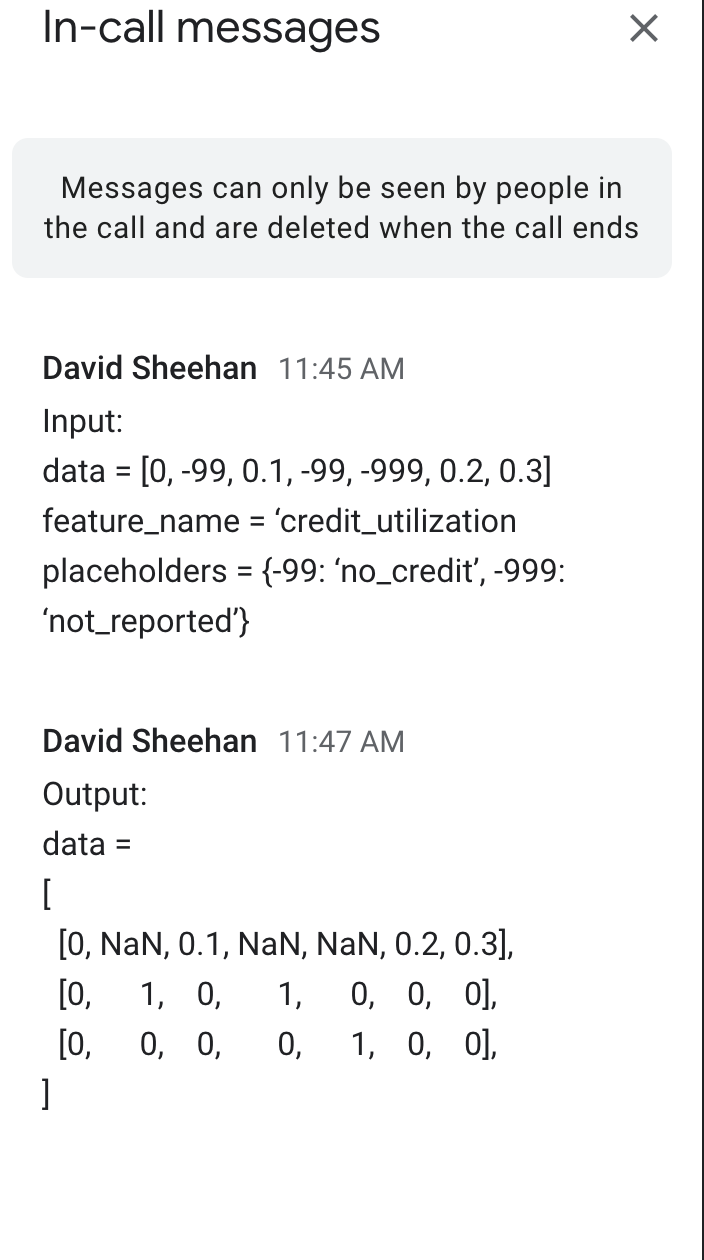

In [ ]:
def oneHot(input, placeholders):
  data = []
  res = []

  for i in range(len(input)):
      if input[i] in placeholders:
        data.append("NaN")
      else:
        data.append(input[i])

  res.append(data)
  for key in placeholders.keys():
    cur = [0 for i in range(len(input))]
    for i in range(len(cur)):
        if input[i] == key:
          cur[i] = 1
    res.append(cur)
  return res

In [ ]:
input = [0, -99, 0.1, -99, -999, 0.2, 0.3]
placeholders = { -99: "no_credit", -999: "not_reported"}
# oneHot(input, placeholders)

In [ ]:
input = [0, -99, 0.1, -99, -999, 0.2, 0.3]
res = []
for key in placeholders.keys():
  cur = [0 for i in range(len(input))]
  for i in range(len(cur)):
      if input[i] == key:
        cur[i] = 1
  res.append(cur)
print("rest" + str(res))

rest[[0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0]]


In [ ]:
def oneHot(input, placeholders):
  data = input
  res = []
  no_credit = []
  not_report = []

  for i in range(len(data)):
      if data[i] in placeholders:
        data[i] = "NaN"
        if data[i] == -99:
          no_credit.append(1)
        count += 1
 
  return res

-99
-999


# 11/17/22 (Array)

## Q1: [1480. Running Sum of 1d Array](https://leetcode.com/problems/running-sum-of-1d-array/)

In [ ]:
def runningSum(self, nums: List[int]) -> List[int]:
    if not nums or len(nums) < 2:
        return nums
    dp = [nums[0] for i in nums]
    for i in range(1, len(nums)):
        dp[i] = dp[i - 1] + nums[i]
    return dp

In [ ]:
nums = [1,2, 3, 4]
res = [nums[0] for i in nums]

for i in range(1, len(nums)):
  res[i] = res[i-1] + nums[i]

print (res)

[1, 3, 6, 10]


## Q2: [35. Search Insert Position](https://leetcode.com/problems/search-insert-position/)

[Binary search](https://www.youtube.com/watch?v=RH3tZldhjJ0) 

In [ ]:
def searchInsert(self, nums: List[int], target: int) -> int:
    strt = 0 #start index
    end = len(nums) - 1 #end index
    while strt <= end:
        mid = (strt + end) // 2 
        if target < nums[mid]: 
            end = mid - 1 
        elif target > nums[mid]: 
            strt = mid + 1 
        else:
            return mid
    return strt 

## Q3: [33. Search in Rotated Sorted Array](https://leetcode.com/problems/search-in-rotated-sorted-array/)

In [ ]:
def search(self, nums: List[int], target: int) -> int:
    #corner case
    if not nums:
        return -1
    left = 0
    right = len(nums) - 1
    while left <= right:
        mid = (left + right) // 2
        if nums[mid] == target:
            return mid
        if nums[mid] < nums[right]:
            if nums[mid] < target and target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1
        else:
            if nums[mid] > target and target >= nums[left]:
                right = mid - 1
            else:
                left = mid + 1
    return -1

## Q4: [81. Search in Rotated Sorted Array II](https://leetcode.com/problems/search-in-rotated-sorted-array-ii/)

In [ ]:
def search(self, nums: List[int], target: int) -> bool:
    #corner case
    if not nums:
        return -1
    left = 0
    right = len(nums) - 1
    while left <= right:
        while left < right and nums[left] == nums[left+1]:
            left += 1
        while left < right and nums[right] == nums[right-1]:
            right -= 1
        mid = (left + right) // 2
        if nums[mid] == target:
            return True
        
        if nums[mid] < nums[right]:
            if nums[mid] < target and target <= nums[right]:
                left = mid + 1
            else:
                right = mid - 1
        else:
            if nums[mid] > target and target >= nums[left]:
                right = mid - 1
            else:
                left = mid + 1
    return False

# 11/22/22 (binary search)

## Q1: [69. Sqrt(x)](https://leetcode.com/problems/sqrtx/)


In [ ]:
def mySqrt(self, x: int) -> int:
    ## APPROACH : Binary Search ##
    #   1. Any number greater than 1, will have sqrt(n) less than n/2
    #   2. We can check i*i < n till n/2.
    #   3. Can be optimized with binary search, listing all nums till n/2 and check i*i < n
    #corner case
    if x < 4:
        if x != 0:
            return 1
        else:
            return 0
    left = 0
    right = x // 2
    while left <= right:
        mid  = (left + right) // 2
        if mid ** 2 < x:
            left = mid + 1
        elif mid ** 2 > x:
            right = mid - 1
        else:
            return mid
    return right

## Q2: [162. Find Peak Element](https://leetcode.com/problems/find-peak-element/)


In [ ]:
#https://blog.csdn.net/danspace1/article/details/86645720
def findPeakElement(self, nums: List[int]) -> int:
    left, right = 0, len(nums) - 1
    while left < right :
        mid = (left + right)//2
        if nums[mid] > nums[mid+1]:
            right = mid
        else:
            left = mid + 1
    return left 

## Q3: [34. Find First and Last Position of Element in Sorted Array](https://leetcode.com/problems/find-first-and-last-position-of-element-in-sorted-array/)

In [ ]:
def searchRange(self, nums: List[int], target: int) -> List[int]:
    left = self.findFirstOccurIndex(nums, target)
    right = self.findLastOccurIndex(nums, target)
    return [left, right]
    
def findFirstOccurIndex(self, nums: List[int], target: int) -> int:
    index = -1 #5 
    left, right = 0, len(nums) -1 #6
    
    while left <= right: #7
        mid = (left + right) // 2 #8
  
        if nums[mid] == target: #9
            index = mid #10
            right = mid - 1 #11
        elif nums[mid] > target:  #12
            right = mid - 1 #13
        else:  #14
            left = mid + 1 #15       
    
    return index
def findLastOccurIndex(self, nums: List[int], target: int) -> int:
    index = -1
    left, right = 0, len(nums) -1
    
    while left <= right:
        
        mid = (left + right) // 2
        
        if nums[mid] == target:
            index = mid
            left = mid + 1 #16
        elif nums[mid] > target: 
            right = mid - 1
        else:
              left = mid + 1
        
        
    
    return index

# 12/15/22 (蒸汽python)

## Q1: [replace-words-with-stems (python)](https://leetcode.com/problems/replace-words/solutions/?orderBy=most_votes)

In [ ]:
def replaceWords(self, roots, sentence):
    rootset = set(roots)

    def replace(word):
        for i in xrange(1, len(word)):
            if word[:i] in rootset:
                return word[:i]
        return word

    return " ".join(map(replace, sentence.split()))

## Q2: [minimum-change (python)](https://leetcode.com/problems/coin-change/description/)

In [ ]:
class Solution(object):
    def coinChange(self, coins, amount):
        MAX = float('inf')
        dp = [0] + [MAX] * amount

        for i in xrange(1, amount + 1):
            dp[i] = min([dp[i - c] if i - c >= 0 else MAX for c in coins]) + 1

        return [dp[amount], -1][dp[amount] == MAX]

## Q3: [friendship-timeline (python)](https://priyankabanerjee.medium.com/guide-for-data-science-interview-python-71901df4bd44)

In [ ]:
#https://priyankabanerjee.medium.com/guide-for-data-science-interview-python-71901df4bd44
def friendship_timeline(fd_added, fd_removed):
    friendship = []
    for rem in fd_removed:
        for add in fd_added:
            if sorted(rem['user_ids']) == sorted(add['user_ids']):
                fd_added.remove(add)
                friendship.append({
                    'user_ids': sorted(rem['user_ids']),
                    'start_date': add['created_at'],
                    'end_date': rem['created_at']
                })
                break
    return sorted(friendship, key=lambda x: x['user_ids'])

## Q4: [multi-modal-sample (python)](https://www.glassdoor.com/Interview/1-coding-question-Write-a-function-for-sampling-from-a-multimodal-distribution-Your-inputs-are-Keys-i-e-green-r-QTN_3822244.htm)

In [ ]:
#from openAI
import random

def sample_multimodal(keys, weights, num_samples):
  # Create a list of weighted choices, where each key appears
  # as many times as its weight
  choices = []
  for key, weight in zip(keys, weights):
    choices.extend([key] * int(weight))
  
  # Randomly choose num_samples elements from the list of choices
  return random.sample(choices, num_samples)

## Q5: [prime-to-n (python)](https://stackoverflow.com/questions/11619942/print-series-of-prime-numbers-in-python)

In [ ]:
def primes_method1(n):
    out = list()
    for num in range(1, n+1):
        prime = True
        for i in range(2, num):
            if (num % i == 0):
                prime = False
                print (i)
                break
        if prime:
            out.append(num)
    return out

## Q6: [find-the-missing-number (python)](https://leetcode.com/problems/missing-number/description/)

In [ ]:
def missingNumber(self, nums):
    num_set = set(nums)
    n = len(nums) + 1
    for number in range(n):
        if number not in num_set:
            return number

## Q7: [move-zeros-back (python)](https://leetcode.com/problems/move-zeroes/)

In [ ]:
def moveZeroes(self, nums: List[int]) -> None:
    """
    Do not return anything, modify nums in-place instead.
    """
    #corner case
    if not nums or len(nums) == 1:
        return
    slow = fast = 0
    while fast < len(nums):
        if nums[fast] != 0:
            nums[slow] = nums[fast]
            slow += 1
        fast += 1
    while slow < len(nums):
        nums[slow] = 0
        slow += 1

## Q8: [equivalent-index (python)](https://leetcode.com/problems/find-pivot-index/description/)

In [ ]:
def pivotIndex(self, nums):
    # Time: O(n)
    # Space: O(1)
    left, right = 0, sum(nums)
    for index, num in enumerate(nums):
        right -= num
        if left == right:
            return index
        left += num
    return -1

# 1/6/23 (蒸汽python)

## Q1: [how-many-friends(algorithms)](https://www.glassdoor.com/Interview/python-question-given-a-two-dimensional-list-for-example-2-3-3-4-5-person-2-is-friends-with-3-etc-find-how-many-QTN_4014845.htm)
You are given a list of lists where each group represents a
friendship. For example, given the list: list = [[2,3],[3,4],[5]] Person 2 is friends with person 3, person 3 is friends with person 4, etc. Write a function to find how many friends each person has. how-many-friends(algorithms) 难度标题 【Medium】 公司标签 / 题目标签 【algorithms】

friends = [[1,3],[2,3],[3,5],[4]] friends = [[1],[2],[3],[4]]

[(1,1), (2,1), (3,3), (4,0), (5,1)]

Explanation: every person has no friends on the friends list

In [ ]:
def friends(rels):
    fs = dict()
    for r in rels:
        if len(r) == 1:
            if r[0] not in fs:
                fs[r[0]] = 0
        else:
            if r[0] not in fs:
                fs[r[0]] = 1
            else:
                fs[r[0]] += 1
            if r[1] not in fs:
                fs[r[1]] = 1
            else:
                fs[r[1]] += 1
    return fs

In [ ]:
#WRONG!!!!!!!!!!
def friends(rels):
    fs = dict()
    for r in rels:
        if len(r) == 1:
            fs[r[0]] = 0
        else:
            fs[r[0]] =+ 1
            fs[r[1]] =+ 1
    return fs

In [ ]:
from collections import Counter

def friends(rels):
    fs = Counter()
    for r in rels:
        if len(r) == 1:
            fs[r[0]] = 0
        else:
            fs[r[0]] += 1
            fs[r[1]] += 1
    return fs

In [ ]:
from collections import defaultdict

def friends(rels):
    fs = defaultdict(int)
    for r in rels:
        if len(r) == 1:
            fs[r[0]] += 0
        else:
            fs[r[0]] += 1
            fs[r[1]] += 1
    return fs

In [ ]:
rels = [[1,3],[3,5],[3,5],[4]] 
friends(rels)

{1: 1, 3: 3, 5: 2, 4: 0}

## Q2: [1200. Minimum Absolute Difference](https://leetcode.com/problems/minimum-absolute-difference/)

In [ ]:
def minimumAbsDifference(self, arr: List[int]) -> List[List[int]]:
    # Sort the original array
    arr.sort()

    # Initialize minimum difference `min_pair_diff` as a huge integer in order not 
    # to miss the absolute difference of the first pair. 
    min_pair_diff = float('inf')
    answer = []

    # Traverse the sorted array
    for i in range(len(arr) - 1):
        # For the absolute value `curr_pair_diff` of the current pair:
        curr_pair_diff = arr[i + 1] - arr[i]

        # If `curr_pair_diff` equals `min_pair_diff`, add this pair to the answer list.
        # If `curr_pair_diff` is smaller than `min_pair_diff`, discard all pairs in the answer list, 
        # add this pair to the answer list and update `min_pair_diff`.
        # If `curr_pair_diff` is larger than `min_pair_diff`, we just go ahead.
        if curr_pair_diff == min_pair_diff:
            answer.append([arr[i], arr[i + 1]])
        elif curr_pair_diff < min_pair_diff:
            answer = [[arr[i], arr[i + 1]]]
            min_pair_diff = curr_pair_diff

    return answer

## Q3: [134. Gas Station](https://leetcode.com/problems/gas-station/description/)

In [ ]:
#https://www.cnblogs.com/grandyang/p/4266812.html
def canCompleteCircuit(self, gas, cost):
    """
    :type gas: List[int]
    :type cost: List[int]
    :rtype: int
    """
    n = len(gas)
    
    total_tank, curr_tank = 0, 0
    starting_station = 0
    for i in range(n):
        total_tank += gas[i] - cost[i]
        curr_tank += gas[i] - cost[i]
        # If one couldn't get here,
        if curr_tank < 0:
            # Pick up the next station as the starting one.
            starting_station = i + 1
            # Start with an empty tank.
            curr_tank = 0
    
    return starting_station if total_tank >= 0 else -1